#### 1. QUEST CCD field of view
The QUEST CCD field of view is:

(600 x 0.88") x (2400 x 0.88") = <font color='blue'><b>528" x 2112"</b></font>

Compared to the Moon's 0.5 deg diameter (0.5 x 3600" = 1800"), the rectangular QUEST CCD field of view has roughly one-third its width and is slightly longer in height. 



#### 2. Neptune vs main-belt asteroid motion in QUEST
To calculate the angular displacement of Neptune or main belt asteroids over the 8-hour observation window:

For Neptune: (2 x pi)/165 years x 8 hrs = (2 x pi)/(165 x 365 x 24) x 8 = 3.478E-5 rad = 1.993E-3 deg = <font color='blue'><b>7.17"</b></font> which corresponds to 8 pixels in QUEST.


For main-belt asteroid at 3 A.U.:
To find orbital period, we use Kepler's Third Law which in units of Earth years and A.U. is T^2 = a^3. Then,

165^2 / 30^3 = T^2 / 3^3 => T = 5.2 years 


(2 x pi)/5.2 years x 8 hrs = (2 x pi)/(5.2 x 365 x 24) x 8 = 1.10E-3 rad = 0.0632 deg = 
<font color='red'><b>228"</b></font> which corresponds to 259 pixels in QUEST.

As both 8 and 259 pixels are well within the field of view of QUEST, Neptune and main-belt asteroid motion should both be observable during one night of observation. 



#### 3. Estimate parallax motion
To estimate the parallax-only motion of Neptune and main-belt asteroids, we first need to determine how much the Earth moves (displacement) during the 8 hour observation time. Using the angular velocity of Earth and its 1 A.U. distance from the Sun,

Earth displacement = 8 hrs x (2 x pi/ 1 year) x 1 A.U. = 8 x 2 x pi / (365 x 24) x 1 = 0.005738 A.U.

Parallax only for Neptune: 0.005738/30 = 1.912E-4 rad (<font color='blue'><b>39.5"</b></font> or about 45 pixels), >> orbital only motion calculated in 2. 

Parallax only for main-belt asteroid: 0.005738/3 = 0.00191 rad (<font color='red'><b>394"</b></font> or about 448 pixels), only slightly larger than the orbital only motion calculated in 2. 

Hence, determining distances using parallax only and neglecting the object motion is reasonable for Neptune but not as much for main-belt asteroids. 

#### 4. Neptune's moons

Using data from https://www.britannica.com/place/Triton-astronomy, the mean orbital distances to Neptune for the brightest moons are:

- Triton - 354,759 km
- Proteus - 117,646 km
- Nereid - 5,513,818 km

Using theta = (mean distance)/30 A.U. = (mean distance (km))/(30 x 1.496 x 10E8 km), maximum distances are: 

- Triton - 7.90E-5 rad --> 16.3" --> 19 pixels in QUEST
- Proteus - 2.62E-5 rad --> 5.41" --> 6 pixels in QUEST
- Nereid - 0.001223 rad --> 253" --> 288 pixels in QUEST


### ----------  Previously from PSET 5 ---------- 

The overscan region can be taken as lasting from pixel 570 onwards to 639 (right edge) and 0 to 119 (bottom edge). Dark frames were subtracted from flats (10s exposure) and science images (180s exposure)


In [144]:
# import headers
from astropy.io import fits
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pylab as py


#### Helper functions for data reduction process

In [145]:
def show_picture(data, low, high):
    """Shows a picture between 1st and 99th percentiles of 
    input data set, using plt"""
    fig = plt.figure(figsize = (10, 10))
    plt.imshow(data, origin = 'lower', cmap = 'gray_r', \
           vmin = np.percentile(data, low), \
           vmax = np.percentile(data, high))
    plt.axis('off')
    plt.colorbar()
    return

def make_histogram(data):
    """Plot a histogram from data"""
    hist = plt.hist((data).flatten(), bins = 40, color = 'k')
    plt.xscale('linear')
    plt.yscale('log')
    #plt.axvline(np.percentile(data, 1), ls = ':', color = 'blue')
    plt.axvline(np.percentile(data, 99), ls = '--', color = 'red')
    return hist

def get_average(data):
    """Gets mean of data set (array of array)"""
    row_norms = []
    for row in data:
        # append norm from linear algebra package
        row_norms.append(np.mean(row))
    return np.mean(row_norms)


#### Subtract the overscan and normalize flat fields

In [146]:
# need to read dark first, subtract in flat field
dark = fits.open('dark_180.C22.fits')
dark10 = fits.open('dark_10.C22.fits')

dark.info()
header_dark = dark[0].header

data_dark = dark[0].data.copy()
data_dark10 = dark10[0].data.copy()


Filename: dark_180.C22.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (640, 2400)   float32   


In [148]:
def normalize_flat_field(image_name):
    """Function to do steps 6 and 7, with helper functions defined above
    image_name is a string
    Returns normalized flat image data (array of arrays)"""

    try:
        this_flat = fits.open(image_name)
    except:
        print("Error: file not located. Please check directory.")
        return
    
    this_flat.info()
    header_flat = this_flat[0].header
    print()
    
    data_flat = this_flat[0].data.copy()
    
    print("Original image above, corrected image without overscan below.")
    #show_picture(data_flat,1,99)

    data_flat = data_flat[120:,:570] 

    #show_picture(data_flat,1,99)   # overscan removed
    
    data_flat = data_flat - data_dark10[120:,:570]  # remove dark
    
    data_flat = data_flat/get_average(data_flat) # normalize
    return data_flat


#### Actual computation of overscan subtraction:

In [150]:
flats_list = {'20130911095457m.C22_flat.fits':[], '20130911095548m.C22_flat.fits':[],\
             '20130911095732m.C22_flat.fits':[], '20130911095641m.C22_flat.fits':[],\
             '20130911095822m.C22_flat.fits':[]}

for flat in flats_list:    # append data to dictionary
    flats_list[flat] = normalize_flat_field(flat)
    

Filename: 20130911095457m.C22_flat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (640, 2400)   float32   

Original image above, corrected image without overscan below.
Filename: 20130911095548m.C22_flat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (640, 2400)   float32   

Original image above, corrected image without overscan below.
Filename: 20130911095732m.C22_flat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (640, 2400)   float32   

Original image above, corrected image without overscan below.
Filename: 20130911095641m.C22_flat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (640, 2400)   float32   

Original image above, corrected image without overscan below.
Filename: 20130911095822m.C22_flat.fits
No.    Name      Ver    Type    

(2280, 570)
The new image mean is 1.0


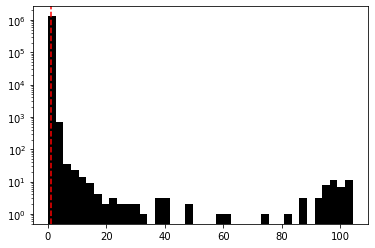

In [152]:
print(flats_list['20130911095457m.C22_flat.fits'].shape)

make_histogram(flats_list['20130911095457m.C22_flat.fits'])
print("The new image mean is", \
      round(get_average(flats_list['20130911095457m.C22_flat.fits']),3))  


#### Median combine the flat fields

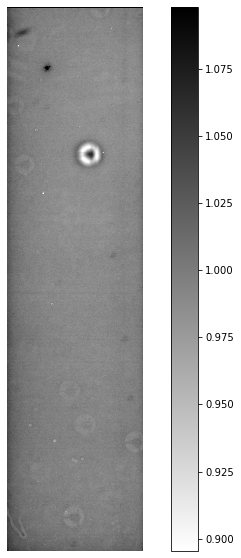

In [153]:

combined_flat = []     # transfer to a new array
for row_count in range(2280):
    all_flat_array = []
    for flat in flats_list:
        all_flat_array.append(flats_list[flat][row_count])
    row_median = np.median(all_flat_array, axis = 0)
    combined_flat.append(row_median)
    
show_picture(combined_flat,0.1,99.9)


### ---------- new code for Pset 6 ---------- 

#### 5. Science data processing with dark subtraction, flat field and overscan trim


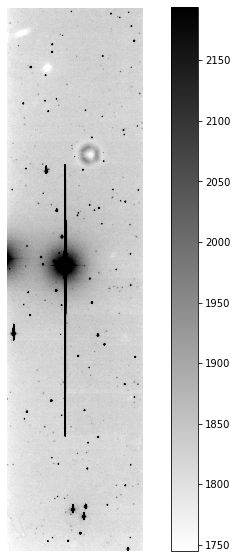

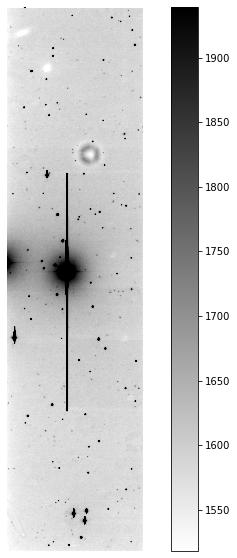

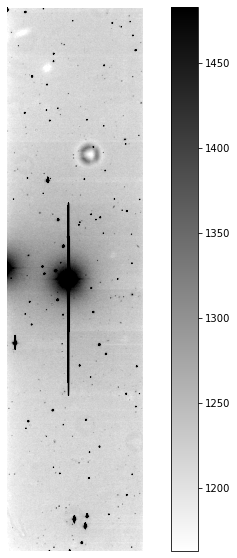

In [155]:
science_dict = {'20130910234901s.C22_science.fits': [],
                '20130911020246s.C22_science.fits': [],
                '20130911040543s.C22_science.fits': []}

def science_processing(science):
    """Science processing function, where science input is file string name
    Returns corrected science image"""

    this_science = fits.open(science)
    header_science = this_science[0].header
    data_science = this_science[0].data   
    #show_picture(data_science,1,99)   # Original
    
    data_science = data_science[120:,:570]   # remove overscan

    data_science = data_science - data_dark[120:,:570]  # remove dark

    for row_idx in range(len(combined_flat)):
        for column_idx in range(len(combined_flat[row_idx])):
            data_science[row_idx][column_idx] /= combined_flat[row_idx][column_idx]
    show_picture(data_science,1,99)    # show final science
        
    return data_science  

for science in science_dict:    # append data to dictionary
    science_dict[science] = science_processing(science)
    
    

#### 6. Sky subtract with histogram of bin size 100

Science data histogram:


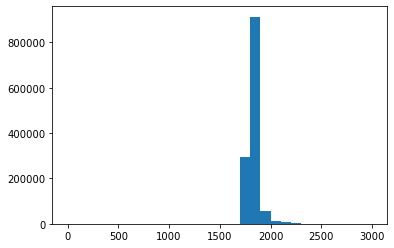

Science data histogram:


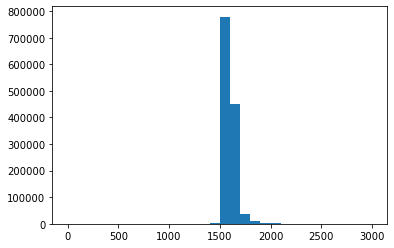

Science data histogram:


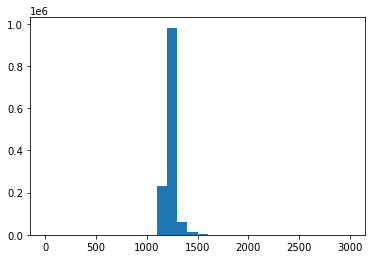

The observed mode values are 1850, 1550, 1250.


In [156]:
for science in science_dict:    # append data to dictionary
    print("Science data histogram:")
    plt.hist(science_dict[science].flatten(), bins = 30, range=(0,3000))
    plt.show()
    
print("The observed mode values are 1850, 1550, 1250.")


In [157]:
# subtract from science images
science_dict['20130910234901s.C22_science.fits'] -= 1850 
science_dict['20130911020246s.C22_science.fits'] -= 1550
science_dict['20130911040543s.C22_science.fits'] -= 1250


#### 7. Shifting the science data

In [158]:
image1_xy = [[199,1335],[348,1262],[357,1162],[207,1212]]
image2_xy = [[203,1318],[351,1245],[360,1145],[210,1196]]
image3_xy = [[205,1294],[354,1223],[363,1123],[213,1172]]

image2_xshift = 0
image2_yshift = 0
image3_xshift = 0
image3_yshift = 0

for i in range(len(image2_xy)):
    # check sign -- after applying the shift to image2, center with image1
    image2_xshift -= (image2_xy[i][0] - image1_xy[i][0])/len(image2_xy)
    image2_yshift -= (image2_xy[i][1] - image1_xy[i][1])/len(image2_xy)
    image3_xshift -= (image3_xy[i][0] - image1_xy[i][0])/len(image3_xy)
    image3_yshift -= (image3_xy[i][1] - image1_xy[i][1])/len(image3_xy)
    
print("The second science image must be x-shifted by",image2_xshift, \
      "and y-shifted by", image2_yshift)
print("The third science image must be x-shifted by",image3_xshift, \
      "and y-shifted by", image3_yshift)


The second science image must be x-shifted by -3.25 and y-shifted by 16.75
The third science image must be x-shifted by -6.0 and y-shifted by 39.75


In [159]:
from scipy import ndimage

# check naming of 2nd and 3rd science image, (yshift, xshift) format
science_dict['20130911020246s.C22_science.fits'] =\
scipy.ndimage.interpolation.shift(science_dict['20130911020246s.C22_science.fits'],\
                                  (image2_yshift, image2_xshift))

science_dict['20130911040543s.C22_science.fits']  = \
scipy.ndimage.interpolation.shift(science_dict['20130911040543s.C22_science.fits'],\
                                  (image3_yshift, image3_xshift))


# check shapes
print(science_dict['20130910234901s.C22_science.fits'].shape)
print(science_dict['20130911040543s.C22_science.fits'].shape)
print(science_dict['20130911020246s.C22_science.fits'].shape)


(2280, 570)
(2280, 570)
(2280, 570)


#### 8. Visually find moving targets
Export FITS files to open in DS9; sinh and zscale settings used. 

In [160]:
# saving the reduced science images
i = 1
for science in science_dict:    # append data to dictionary
    hdu = fits.PrimaryHDU(science_dict[science])
    hdu.writeto(str('newscience'+str(i)+'.fits'), overwrite=True)
    i += 1
    

#### Show median combined final science image for reference
The "repeated" dust donut shows image alignment worked. 

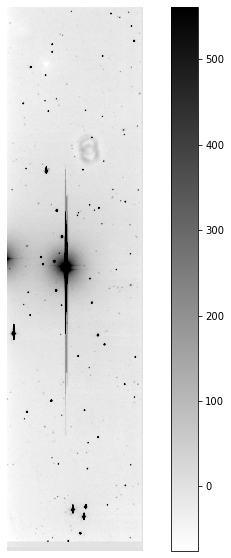

In [161]:
combined_science = []
for row_count in range(2280):
    all_science_array = []
    for science in science_dict:
        all_science_array.append(science_dict[science][row_count])
    row_median = np.median(all_science_array, axis = 0)
    combined_science.append(row_median)
    
show_picture(combined_science, 0.5, 99.5)


#### 9. Measure positions

In [162]:
# Check times
i = 1
for science in science_dict:    # append data to dictionary
    file = fits.open(science)
    print("Science",i,"image taken at:",file[0].header[9])
    i += 1

print()
print("Between 1st and 2nd images, time of 8025 seconds elapsed.")
print("Between 2nd and 3rd images, time of 7377 seconds elapsed.")


Science 1 image taken at: 2013-09-10T23:49:02
Science 2 image taken at: 2013-09-11T02:02:47
Science 3 image taken at: 2013-09-11T04:05:44

Between 1st and 2nd images, time of 8025 seconds elapsed.
Between 2nd and 3rd images, time of 7377 seconds elapsed.


In [128]:
# first moving object - asteroid
print("In 1st image, the moving object is at x = 469 pixel, y = 1142 pixel.")
print("In 2nd image, the moving object is at x = 466 pixel, y = 1159 pixel.")
print("In 1st image, the moving object is at x = 463 pixel, y = 1182 pixel.")

rate1 = np.sqrt(3**2 + 17**2)*0.88/(8025/(24*3600))
rate2 = np.sqrt(3**2 + 23**2)*0.88/(7377/(24*3600))
angsep1 = np.sqrt(6**2 + 40**2)*0.88/3600*np.pi/180  # in radian
rate_avg1= (rate1+rate2)/2

print()
print("Angular velocity in arcsec/day:",round(rate_avg1,5))
print("Angular displacement observed in rad:",round(angsep1,5))



In 1st image, the moving object is at x = 469 pixel, y = 1142 pixel.
In 2nd image, the moving object is at x = 466 pixel, y = 1159 pixel.
In 1st image, the moving object is at x = 463 pixel, y = 1182 pixel.

Angular velocity in arcsec/day: 201.30692
Angular displacement observed in rad: 0.00017


In [139]:
# second moving object - Neptune moon
print("In 1st image, the moving object is at x = 229 pixel, y = 1198 pixel.")
print("In 2nd image, the moving object is at x = 232 pixel, y = 1189 pixel.")
print("In 1st image, the moving object is at x = 235 pixel, y = 1181 pixel.")

rate1 = np.sqrt(3**2 + 9**2)*0.88/(8025/(24*3600))
rate2 = np.sqrt(3**2 + 8**2)*0.88/(7377/(24*3600))
angsep2 = np.sqrt(6**2 + 17**2)*0.88/3600*np.pi/180  # in radian
rate_avg2 = (rate1+rate2)/2


print()
print("Angular velocity in arcsec/day:",round(rate_avg2,5))
print("Angular displacement observed in rad:",round(angsep2,5))


In 1st image, the moving object is at x = 229 pixel, y = 1198 pixel.
In 2nd image, the moving object is at x = 232 pixel, y = 1189 pixel.
In 1st image, the moving object is at x = 235 pixel, y = 1181 pixel.

Angular velocity in arcsec/day: 88.97093
Angular displacement observed in rad: 8e-05


#### 10. Estimate parallax distance

In [170]:
Earth_disp = (8025+7377)*(2*np.pi/(365*24*3600))  # in A.U., over 8 hours
par_dist1 = Earth_disp/angsep1
print("Earth displacement is (in A.U.):", round(Earth_disp,6))
print("Parallax distance in A.U.:", round(par_dist1,3))

print("Assuming parallax only, this object is ", round(par_dist,3),\
      "A.U. from Earth which correspodns may be an asteroid. However",
      "some inaccuracy is expected since parallax alone is insufficient for",
      "measuring distances in the case of asteroids.")



Earth displacement is (in A.U.): 0.003069
Parallax distance in A.U.: 17.783
Assuming parallax only, this object is  17.783 A.U. from Earth which correspodns may be an asteroid. However some inaccuracy is expected since parallax alone is insufficient for measuring distances in the case of asteroids.


In [172]:
par_dist2 = Earth_disp/angsep2
print("Parallax distance in A.U.:", round(par_dist2,3))
print("From the distance, this is is most likely one of Neptune's moons, probably Triton.")

Parallax distance in A.U.: 39.898
From the distance, this is is most likely one of Neptune's moons, probably Triton.


#### Extra: GIFs of asteroid and moon 

RA/Dec of Neptune from https://ssd.jpl.nasa.gov/horizons/app.html#/

HH MM SS.SS DD MM SS.SS format:

22 22 09.70 -10 54 52.2

Neptune center at: (237, 1197)

-----
#### Asteroid
Since RA increases with increasing y-pixels and declination decreases with increasing x-pixels, at the observed (x = 469 pixel, y = 1142 pixel) of the asteroid, we have
- RA: + (469-237) x 0.88"/px x 0.0667 = 13.617 seconds
- Dec: -(1142-1197) x 0.88"/px x 0.0667 = 3.228 seconds

So the object RA/Dec position is 22:22:23.32, -10:54:55.4

-----
#### Triton

At the observed (x = 301 pixel, y = 1362 pixel) of the moon, we have
- RA: + (301-237) x 0.88"/px x 0.0667 = 3.76 seconds
- Dec: -(1362-1197) x 0.88"/px x 0.0667 = -9.68 seconds

So the object RA/Dec position is 22:22:13.46, -10:54:42.5. This is most likely Triton due to the brightness and close distance to Neptune. 
